In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# load data from csv
df = pd.read_csv('diagnosis_data.csv')
print(df.head())

   cough  fever  age  history  diagnosis
0      0      1   26        0       Cold
1      1      0   27        0       Cold
2      1      1   38        1       Cold
3      0      0   48        1  Pneumonia
4      1      0   63        1       Cold


In [7]:
# Preprocessing
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y )

scaler = StandardScaler()  # For numerical features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Choosing k using Gridsearch or similars + Cross Validation can be included
k = 5 # To illustrate how training would happen and measure scores

In [10]:
# Model Training and Prediction
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [11]:
# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Allergy       0.25      0.27      0.26        15
        Cold       0.42      0.65      0.51        20
         Flu       1.00      0.25      0.40        16
   Pneumonia       0.89      0.89      0.89         9

    accuracy                           0.48        60
   macro avg       0.64      0.51      0.51        60
weighted avg       0.60      0.48      0.47        60



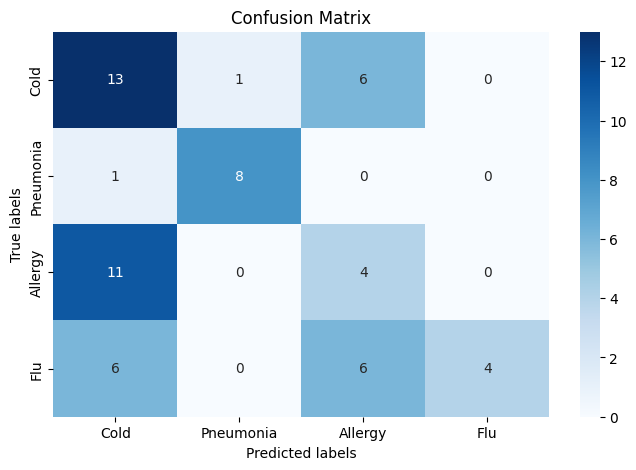

In [13]:
#Confusion Matrix
cm = confusion_matrix(y_test,y_pred, labels=df["diagnosis"].unique())
plt.figure(figsize = (8,5))

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap="Blues");  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(df["diagnosis"].unique()); ax.yaxis.set_ticklabels(df["diagnosis"].unique());


plt.show()